# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:**

- Names: Stella Ho, Zeyuan Li, Jiongbin Liu 
- Student IDs: 219313152, 218197701, 219361645
- Emails: hoste@deakin.edu.au, lizeyu@deakin.edu.au, liujio@deakin.edu.au

---

# 1.Import Spark

In [1]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession 

# 2.Read and check data

In [0]:
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [4]:
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [5]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 
df.printSchema() 
df.show(5)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+--

In [6]:
# Check data distribution
# You may use printSchema()
df.describe().show()       


+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

# 3.Select features

In [7]:
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2= df.select('age', 'job', 'marital', 'education', 'default', 'balance', 
               'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')

df2.printSchema()
df2.show()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)

+---+-----------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  

In [8]:
#Remove invalid rows/records using spark.sql 
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext.getOrCreate()     
sqlContext = SQLContext(sc)      # Create SQLContext to work with dataframe

df2.registerTempTable("df2")     # Register DataFrame df2 as a table.
df2 = sqlContext.sql("SELECT * FROM df2 WHERE job != 'unknown' AND marital != 'unknown'AND education != 'unknown'\
                    AND default != 'unknown' AND housing != 'unknown' AND loan !='unknown' AND deposit != 'unknown'\
                    AND (poutcome == 'success' OR poutcome == 'failure')")

df2.show()
df2.printSchema()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

In [9]:
#Covert categorical features to metric features using One hot encoding
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

categoricalColumns = ['job','marital','education','default','housing','loan','poutcome']
stages = []

for categoricalCol in categoricalColumns:
    # Indexes each categorical column using the StringIndexer,
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    # Converts the indexed categories into one-hot encoded variables
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
    
# Use the StringIndexer again to encode our labels to label indices
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
# Use the VectorAssembler to combine all the feature columns into a single vector column
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# Use Pipeline to chain multiple Transformers and Estimators together
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)
selectedCols = df2.columns
df2 = df2.select(selectedCols)
df2.printSchema()                   # now have features column and label column

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)
 |-- jobIndex: double (nullable = false)
 |-- jobclassVec: vector (nullable = true)
 |-- maritalIndex: double (nullable = false)
 |-- maritalclassVec: vector (nullable = true)
 |-- educationIndex: double (nullable = false)
 |-- educationclassVec: vector (nullable = true)
 |-- defaultIndex: double (nullable = false)
 |-- defaultclassVec: vector (nullable = true)
 |-- housingIndex: double (nullable = false)
 |-- housingclassVec: vector (nullable = true)
 |-- loanIndex: double (nullable = 

In [10]:
df2.show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+---------------+--------------+-----------------+------------+---------------+------------+---------------+---------+-------------+-------------+----------------+-----+--------------------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|jobIndex|   jobclassVec|maritalIndex|maritalclassVec|educationIndex|educationclassVec|defaultIndex|defaultclassVec|housingIndex|housingclassVec|loanIndex| loanclassVec|poutcomeIndex|poutcomeclassVec|label|            features|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+---------------+--------------+-----------------+------------+---------------+------------+---------------+---------+-------------+-------------+----------------+-----+--------------------

## 3.1 normalisation

In [11]:
#Apply Min-Max normalisation on each attribute using MinMaxScaler  
from pyspark.ml.feature import MinMaxScaler 
from pyspark.sql.functions import col

df_features = df2.select('features')    #df_features dataframe only contains "features"  
scaler = MinMaxScaler(inputCol='features', outputCol='scaledFeatures') # Min-max normalise "features" column, the output refers to scaledFeatures  
df_features = scaler.fit(df_features).transform(df_features)
df_features.show(truncate = False)

# df_features only contains normalised features, named "features"
df_features = df_features.select('scaledFeatures')   
df_features = df_features.select(col("scaledFeatures").alias("features"))
df_features.show(truncate = False)


+-------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                         |scaledFeatures                                                                                                                                                                 |
+-------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(23,[5,10,12,14,16,17,18,19,20,21,22],[1.0,1.0,1.0,1.0,1.0,1.0,33.0,3444.0,1.0,91.0,4.0])        |[0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,

# 4.Unsupervised learning

In [12]:
from pyspark.sql.functions import monotonically_increasing_id
df_labels = df2.select('label')  # df_labels only contains "label" 

df_features = df_features.select("*").withColumn("index",monotonically_increasing_id())  # Index df_features
df_labels = df_labels.select("*").withColumn("index",monotonically_increasing_id())      # Index df_labels

df_label_feature = df_features.join(df_labels, "index","outer").drop("index")   # Join df_features and df_labels together then drop "index" col
df_label_feature.show(truncate = False)   # now have normalised "features" column and "label" column

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                      |label|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.32857142857142857,0.010274889824937303,0.0,0.23681125439624853,0.0]                                |0.0  |
|[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.18571428571428572,0.1679408828613864,0.0,0.10668229777256741,0.0]                                  |0.0  |
|[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.557142857

## 4.1 K-means

In [13]:
# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

# use whole df_label_feature as training data and testing data
# df_label_feature is df2 that contains only "label" and "feature" columns
# set parameter k = 2, two cluserting 
kmeans_model = KMeans().setK(2).setSeed(1).fit(df_label_feature)
predictions = kmeans_model.transform(df_label_feature)


# Evaluate clustering performanc by silhouette criteria
evaluator = ClusteringEvaluator()

# Print the value of Silhouette with squared distance
print('Silhouette with squared distance:', evaluator.evaluate(predictions))

# Convert datatype to double type
classfications = predictions.withColumn('prediction',predictions['prediction'].cast('double'))

# Evaluate the K-means model by accuracy
accuracy = MulticlassClassificationEvaluator(predictionCol="prediction").evaluate(classfications)

# print accuracy
print("Test Accuracy: ", accuracy)

Silhouette with squared distance: 0.30166852656793486
Test Accuracy:  0.5438051682557494


## 4.2 PCA

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[0.9636424850516068,0.3313811478935345]  |
|[0.8373410183626885,0.3880024159205323]  |
|[-0.10845002652578276,0.6564023408615134]|
|[-0.479560942670008,1.1082617061107987]  |
|[0.9576794865061756,0.2714643678687506]  |
|[0.7879027918969023,0.5145147352059565]  |
|[0.5124304692668866,-0.1917648708243116] |
|[-0.7369547765884317,1.0356901001261056] |
|[-0.10282606527163515,0.671822806010155] |
|[1.0661514594145962,0.3285042864447201]  |
|[-0.32474294634018674,0.8134787300694735]|
|[-0.2109752165189983,0.7625432021333773] |
|[0.9643915702012056,0.3276715407315949]  |
|[0.8970032005901719,0.3514814197107741]  |
|[0.47244006359864477,0.6034483574148226] |
|[0.7840860892766188,0.421458958932977]   |
|[-0.7640855001185652,1.117508731487764]  |
|[0.5078194714105165,0.5364599694359978]  |
|[1.020982108328857,0.36510796039610344]  |
|[-0.6823665987365033,-0.5902523

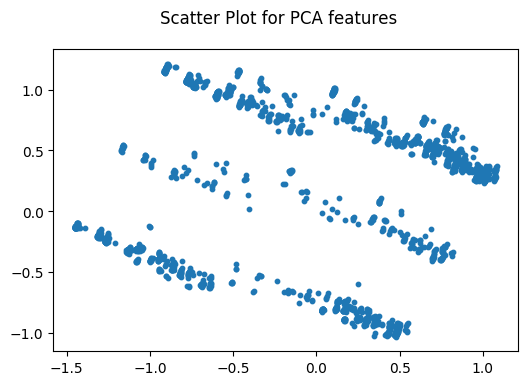

In [14]:
#Generate a scatter plot using the first two PCA components to investigate the data distribution.
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

#Establish PCA model
pca_model = PCA(k=2,inputCol="features", outputCol="pca_features").fit(df_features)
result = pca_model.transform(df_features).select("pca_features")
result.show(truncate = False)

import matplotlib.pyplot as plt
import numpy as np

#Collect results
data_array = np.array(result.collect())
data_array = data_array[:,0,:]      # 3-Dimensional array to 2-Dimensional array  

#Scatter Plot for PCA features
plt.figure(dpi = 100)
plt.suptitle('Scatter Plot for PCA features')
plt.scatter(data_array[:,0],data_array[:,1],s=10,alpha=1)



# 5.Supervised learning

In [15]:
train, test = df_label_feature.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1515
Test Dataset Count: 666


## 5.1 LogisticRegression

In [0]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 


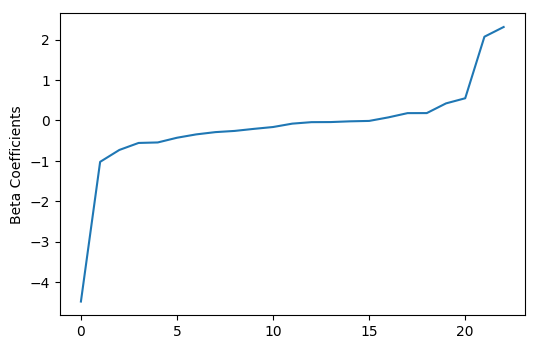

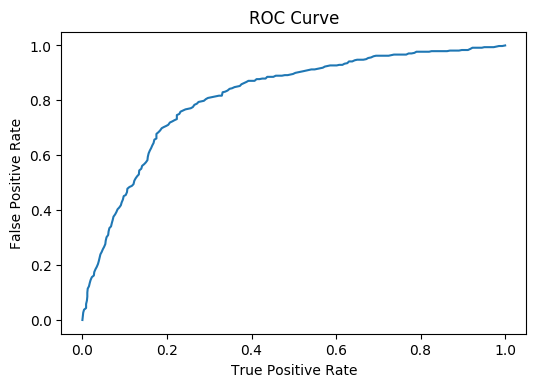

Training set area Under ROC: 0.8137151807364575



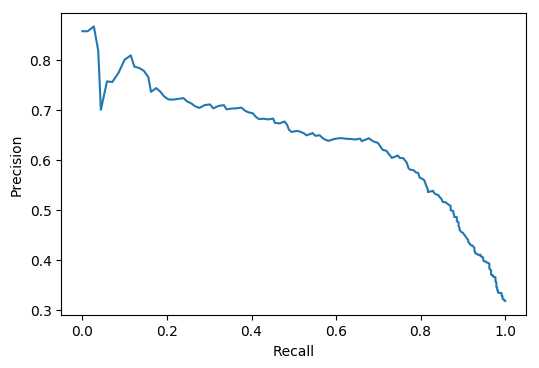

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[0.0,0.0,0.0,0.0,...|  0.0|[-0.1961187119466...|       1.0|[0.45112687044909...|
|[0.0,0.0,1.0,0.0,...|  1.0|[-0.2134937186769...|       1.0|[0.44682837870201...|
|[1.0,0.0,0.0,0.0,...|  0.0|[2.89807529338105...|       0.0|[0.94775120975039...|
|[0.0,0.0,1.0,0.0,...|  0.0|[-0.2484225059824...|       1.0|[0.43821181216364...|
|[0.0,0.0,1.0,0.0,...|  1.0|[2.52403249028008...|       0.0|[0.92580950755353...|
|[1.0,0.0,0.0,0.0,...|  0.0|[2.10188141831806...|       0.0|[0.89108590825970...|
|[1.0,0.0,0.0,0.0,...|  1.0|[0.95437738488102...|       0.0|[0.72199465282967...|
|[0.0,0.0,0.0,0.0,...|  1.0|[-0.6661863527958...|       1.0|[0.33935130544963...|
|[0.0,0.0,0.0,0.0,...|  0.0|[2.91128387680352...|       0.0|[0.94840142871474...|
|[0.0,0.0,0.0,0.

In [17]:
#Exam the coefficients
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

#Obtain the coefficients by using LogisticRegressionModel’s attributes
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)
plt.figure(dpi = 100)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

#Summarize the model over the training set
trainingSummary = lrModel.summary

#Obtain the receiver-operating characteristic and areaUnderROC
roc = trainingSummary.roc.toPandas()

plt.figure(dpi = 100)
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set area Under ROC: ' + str(trainingSummary.areaUnderROC) +'\n')

#Precision and recall
pr = trainingSummary.pr.toPandas()
plt.figure(dpi = 100)
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

#Make predictions on the test set
predictions = lrModel.transform(test)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

#Evaluate the Logistic Regression model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

# Evaluate the Logistic Regression by accuracy
accuracy = MulticlassClassificationEvaluator(predictionCol="prediction").evaluate(predictions)
print('Test Accuracy', accuracy)


In [18]:
#Obtain coefficient
lrMatrix = lrModel.coefficientMatrix
#Convert to array
lrMatrix.toArray()

array([[-0.20794688,  0.18178714,  0.07642485,  0.4227847 , -0.07837289,
        -0.1619766 , -0.42754284, -0.34457928,  0.1827562 ,  0.55000172,
        -0.03949195, -0.02131094, -0.01110934, -0.25866844, -0.28833237,
        -0.72985049, -0.55647765,  2.07346378, -0.04165852, -4.48272277,
         2.31378036, -0.54403398, -1.02435146]])

In [19]:
#Refer to coefficient values, find the desired attributes by index list
df2.schema["features"].metadata["ml_attr"]["attrs"]  #Index list for 23 attributes

{'binary': [{'idx': 0, 'name': 'jobclassVec_management'},
  {'idx': 1, 'name': 'jobclassVec_technician'},
  {'idx': 2, 'name': 'jobclassVec_admin.'},
  {'idx': 3, 'name': 'jobclassVec_blue-collar'},
  {'idx': 4, 'name': 'jobclassVec_retired'},
  {'idx': 5, 'name': 'jobclassVec_services'},
  {'idx': 6, 'name': 'jobclassVec_student'},
  {'idx': 7, 'name': 'jobclassVec_unemployed'},
  {'idx': 8, 'name': 'jobclassVec_self-employed'},
  {'idx': 9, 'name': 'jobclassVec_entrepreneur'},
  {'idx': 10, 'name': 'maritalclassVec_married'},
  {'idx': 11, 'name': 'maritalclassVec_single'},
  {'idx': 12, 'name': 'educationclassVec_secondary'},
  {'idx': 13, 'name': 'educationclassVec_tertiary'},
  {'idx': 14, 'name': 'defaultclassVec_no'},
  {'idx': 15, 'name': 'housingclassVec_no'},
  {'idx': 16, 'name': 'loanclassVec_no'},
  {'idx': 17, 'name': 'poutcomeclassVec_failure'}],
 'numeric': [{'idx': 18, 'name': 'age'},
  {'idx': 19, 'name': 'balance'},
  {'idx': 20, 'name': 'campaign'},
  {'idx': 21, 'n

## 5.2 Decision tree

In [20]:
#Decision tree
from pyspark.ml.classification import DecisionTreeClassifier 

#Decision tree model training
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5)
dtModel = dt.fit(train)

#Decision tree model testing
predictions = dtModel.transform(test)
predictions.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

#Evaluate the decision tree model by accuracy
accuracy = MulticlassClassificationEvaluator(predictionCol="prediction").evaluate(predictions)
print('Test Accuracy', accuracy)

+--------------------+-----+-------------+----------+--------------------+
|            features|label|rawPrediction|prediction|         probability|
+--------------------+-----+-------------+----------+--------------------+
|[0.0,0.0,0.0,0.0,...|  0.0|[134.0,284.0]|       1.0|[0.32057416267942...|
|[0.0,0.0,1.0,0.0,...|  1.0|  [43.0,16.0]|       0.0|[0.72881355932203...|
|[1.0,0.0,0.0,0.0,...|  0.0| [306.0,45.0]|       0.0|[0.87179487179487...|
|[0.0,0.0,1.0,0.0,...|  0.0|[134.0,284.0]|       1.0|[0.32057416267942...|
|[0.0,0.0,1.0,0.0,...|  1.0| [306.0,45.0]|       0.0|[0.87179487179487...|
|[1.0,0.0,0.0,0.0,...|  0.0| [319.0,15.0]|       0.0|[0.95508982035928...|
|[1.0,0.0,0.0,0.0,...|  1.0|  [45.0,33.0]|       0.0|[0.57692307692307...|
|[0.0,0.0,0.0,0.0,...|  1.0|[134.0,284.0]|       1.0|[0.32057416267942...|
|[0.0,0.0,0.0,0.0,...|  0.0| [306.0,45.0]|       0.0|[0.87179487179487...|
|[0.0,0.0,0.0,0.0,...|  1.0|[134.0,284.0]|       1.0|[0.32057416267942...|
+--------------------+---

## 5.3 NaiveBayes

In [21]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#NaiveBayes model training
nb = NaiveBayes(smoothing=1)
model = nb.fit(train)

#NaiveBayes model testing
predictions = model.transform(test)
predictions.filter(predictions['prediction'] == 0) \
    .select('features', 'label', 'rawPrediction', 'prediction', 'probability') \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

# Evaluate the Naivebayes model by accuracy
accuracy = MulticlassClassificationEvaluator(predictionCol="prediction").evaluate(predictions)
print('Test Accuracy', accuracy)



+------------------------------+-----+------------------------------+----------+------------------------------+
|                      features|label|                 rawPrediction|prediction|                   probability|
+------------------------------+-----+------------------------------+----------+------------------------------+
|[0.0,0.0,0.0,0.0,0.0,0.0,1....|  0.0|[-18.326287171791975,-21.32...|       0.0|[0.952310685363231,0.047689...|
|[0.0,0.0,0.0,0.0,0.0,0.0,1....|  0.0|[-17.777828582442005,-20.75...|       0.0|[0.9517591180952214,0.04824...|
|[0.0,0.0,0.0,0.0,1.0,0.0,0....|  0.0|[-19.044658542726005,-22.01...|       0.0|[0.9512293359305574,0.04877...|
|[0.0,0.0,0.0,0.0,1.0,0.0,0....|  0.0|[-19.142809835075994,-21.99...|       0.0|[0.9452032392539527,0.05479...|
|[0.0,0.0,0.0,0.0,1.0,0.0,0....|  0.0|[-18.566158823905592,-21.41...|       0.0|[0.9451994478455119,0.05480...|
|[0.0,0.0,0.0,0.0,1.0,0.0,0....|  0.0|[-15.983569560851791,-18.81...|       0.0|[0.9444812468885602,0.05